In this lab we used the beans dataset and were asked to use the beans feauters to predict which bean it is.

#Imports

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

<ipython-input-1-eabbe6a9c392>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


#Load Datasets

In [2]:
# Load the data
beans_train = pd.read_csv('/content/drive/MyDrive/CS 356/train_dry.csv')
beans_test = pd.read_csv('/content/drive/MyDrive/CS 356/test_dry.csv')
# Display the first few rows of the dataframe
beans_train.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


# About Data


In [3]:
beans_train.describe()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,5416.500000,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,3127.650742,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,0.000000,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,2708.250000,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,5416.500000,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,8124.750000,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,10833.000000,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


In [4]:
# Summary statistics
beans_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

    ID: Numerical; a unique identifier for each bean in the dataset.
    Area: Numerical; represents the total area occupied by a bean in pixel units.
    Perimeter: Numerical; the total length of the boundary of the bean measured in pixels.
    MajorAxisLength: Numerical; length of the major axis of the ellipse that has the same normalized second central moments as the bean.
    MinorAxisLength: Numerical; length of the minor axis of the ellipse equivalent to the bean.
    AspectRation: Numerical; the ratio of the MajorAxisLength to MinorAxisLength, indicating the elongation of the bean.
    Eccentricity: Numerical; measures the eccentricity of the ellipse that has the same second-moments as the bean shape.
    ConvexArea: Numerical; the area of the smallest convex polygon that can enclose the bean.
    EquivDiameter: Numerical; the diameter of a circle with the same area as the bean.
    Extent: Numerical; the ratio of the bean area to the area of the bounding rectangle.
    Solidity: Numerical; the ratio of the bean area to its convex area.
    Roundness: Numerical; measures how close the shape of the bean is to being a circle.
    Compactness: Numerical; indicates how compact the shape of the bean is (related to roundness but includes perimeter).
    ShapeFactor1: Numerical; a shape descriptor based on the bean area and perimeter.
    ShapeFactor2: Numerical; another shape descriptor emphasizing different aspects of the bean's geometry.
    ShapeFactor3: Numerical; a shape descriptor related to the compactness of the bean.
    ShapeFactor4: Numerical; a measure of the bean's convexity.
    y: Categorical; the class label, specifying the type of bean.

y is an object and what we want to predict

ID can be removed

In [5]:
beans_train.value_counts('y')

y
DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: count, dtype: int64

There are 7 types of beans

In [6]:
beans_train.skew(axis=0,numeric_only=True)

ID                 0.000000
Area               2.970246
Perimeter          1.650773
MajorAxisLength    1.390286
MinorAxisLength    2.251468
AspectRation       0.589186
Eccentricity      -1.075626
ConvexArea         2.960315
EquivDiameter      1.971378
Extent            -0.900892
Solidity          -2.507634
roundness         -0.659566
Compactness        0.038242
ShapeFactor1      -0.544873
ShapeFactor2       0.292677
ShapeFactor3       0.245589
ShapeFactor4      -2.628540
dtype: float64

The data is skewed

#Check for outliers

In [7]:
Numeric_cols = beans_train.drop(columns=['y'])

In [8]:
# Checking for outliers using the IQR method
Q1 = Numeric_cols.quantile(0.25)
Q3 = Numeric_cols.quantile(0.75)
IQR = Q3 - Q1
outliers = ((Numeric_cols < (Q1 - 1.5 * IQR)) | (Numeric_cols > (Q3 + 1.5 * IQR))).sum()

outliers

ID                   0
Area               442
Perimeter          406
MajorAxisLength    316
MinorAxisLength    452
AspectRation       397
Eccentricity       683
ConvexArea         442
EquivDiameter      420
Extent             218
Solidity           604
roundness           78
Compactness        108
ShapeFactor1       430
ShapeFactor2         0
ShapeFactor3       167
ShapeFactor4       591
dtype: int64

There are quite a few ouliers. there are around 10,000 data points in this dataset, so I think removing the 300 outilers should be fine.

#Coorelations

In [9]:
beans_train.corr(numeric_only=True)

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
ID,1.000000,-0.006442,0.000679,-0.000639,-0.003572,0.004579,0.001265,-0.006194,-0.002186,-0.008626,-0.015873,-0.015406,-0.003421,-0.004321,-0.004543,-0.002997,-0.001742
Area,-0.006442,1.000000,0.966881,0.933198,0.952536,0.243893,0.268565,0.999940,0.984987,0.061387,-0.200078,-0.354127,-0.270134,-0.848371,-0.640619,-0.274081,-0.365265
Perimeter,0.000679,0.966881,1.000000,0.977830,0.915162,0.386119,0.390878,0.967823,0.991439,-0.013889,-0.307817,-0.543906,-0.407622,-0.866250,-0.768104,-0.409079,-0.439272
MajorAxisLength,-0.000639,0.933198,0.977830,1.000000,0.830452,0.548912,0.539787,0.933934,0.962754,-0.070935,-0.285916,-0.589910,-0.566905,-0.777222,-0.858387,-0.566625,-0.491591
MinorAxisLength,-0.003572,0.952536,0.915162,0.830452,1.000000,-0.003095,0.024388,0.952268,0.949832,0.152157,-0.160567,-0.211275,-0.021042,-0.947040,-0.476659,-0.025152,-0.273554
AspectRation,0.004579,0.243893,0.386119,0.548912,-0.003095,1.000000,0.924040,0.245408,0.305557,-0.372383,-0.266038,-0.762150,-0.987664,0.019197,-0.837526,-0.978550,-0.456479
Eccentricity,0.001265,0.268565,0.390878,0.539787,0.024388,0.924040,1.000000,0.270283,0.319497,-0.319550,-0.295614,-0.716765,-0.970173,0.015644,-0.859207,-0.980946,-0.453895
ConvexArea,-0.006194,0.999940,0.967823,0.933934,0.952268,0.245408,0.270283,1.000000,0.985223,0.059711,-0.209552,-0.358655,-0.271930,-0.848345,-0.642119,-0.275901,-0.371420
EquivDiameter,-0.002186,0.984987,0.991439,0.962754,0.949832,0.305557,0.319497,0.985223,1.000000,0.035291,-0.234767,-0.432327,-0.329457,-0.893598,-0.714397,-0.332067,-0.402038
Extent,-0.008626,0.061387,-0.013889,-0.070935,0.152157,-0.372383,-0.319550,0.059711,0.035291,1.000000,0.180843,0.341669,0.355279,-0.147888,0.235020,0.348442,0.142275


There are a lot of highly coorelated features

#Graphing Features

<Axes: xlabel='MajorAxisLength', ylabel='EquivDiameter'>

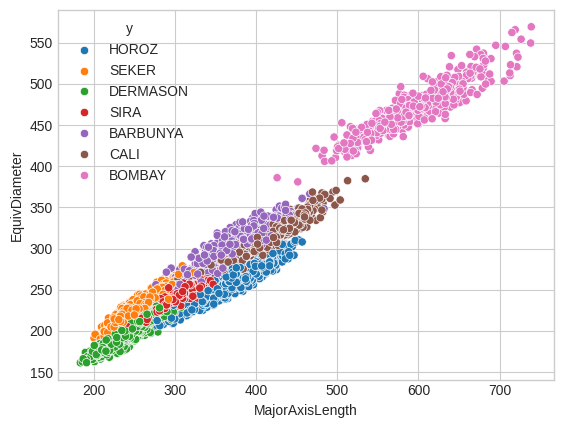

In [10]:
sns.scatterplot(hue='y',x='MajorAxisLength',y='EquivDiameter',data=beans_train)

Bombay seems to be very clearly distinct in all of the graphs.

<Axes: xlabel='MajorAxisLength', ylabel='Perimeter'>

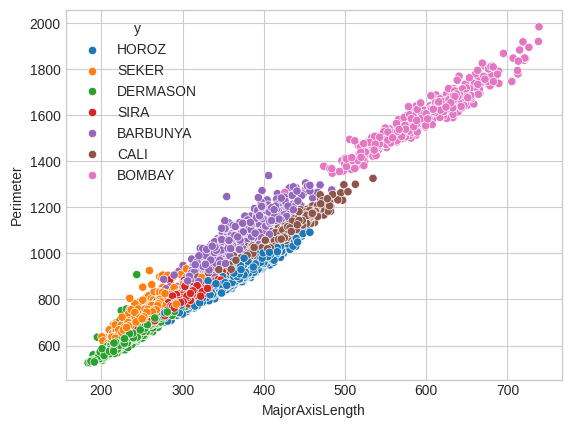

In [11]:
sns.scatterplot(hue='y',x='MajorAxisLength',y='Perimeter',data=beans_train)

<Axes: xlabel='MajorAxisLength', ylabel='Area'>

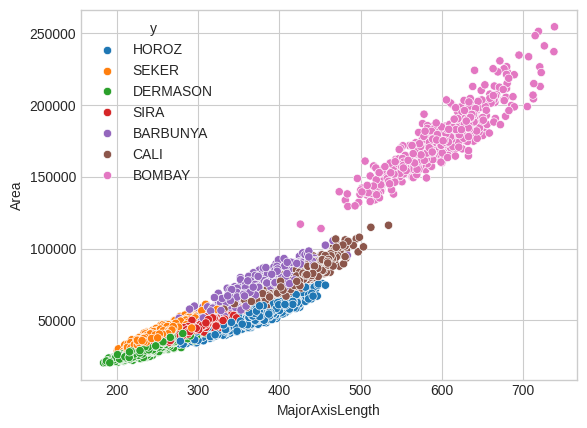

In [12]:
sns.scatterplot(hue='y',x='MajorAxisLength',y='Area',data=beans_train)

<Axes: xlabel='MajorAxisLength', ylabel='ConvexArea'>

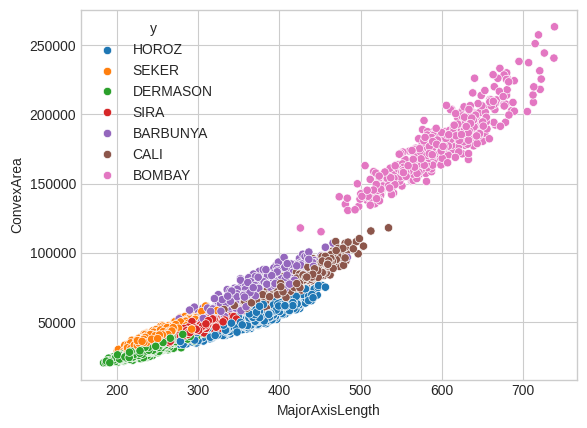

In [13]:
sns.scatterplot(hue='y',x='MajorAxisLength',y='ConvexArea',data=beans_train)

<Axes: xlabel='MajorAxisLength', ylabel='Eccentricity'>

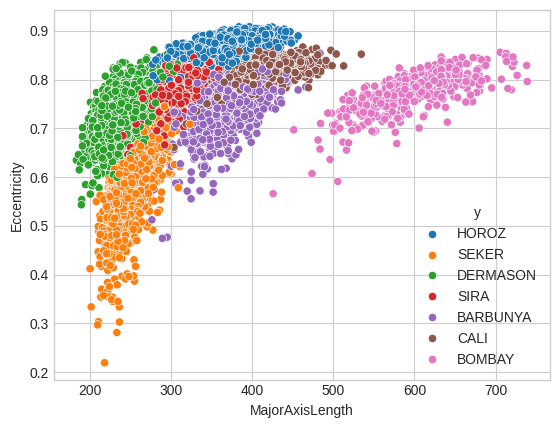

In [14]:
sns.scatterplot(hue='y',x='MajorAxisLength',y='Eccentricity',data=beans_train)

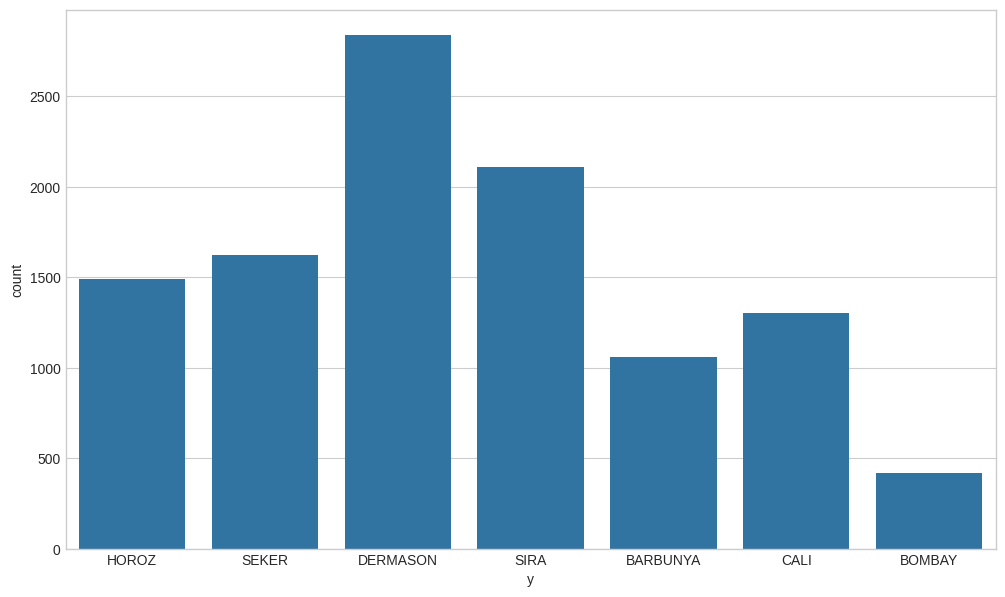

In [15]:
plt.figure(figsize=(12,7))
sns.countplot(x='y', data=beans_train)
plt.show()

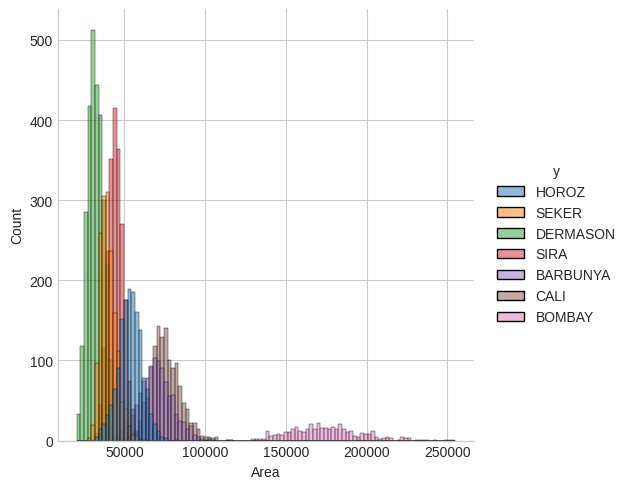

In [16]:
sns.displot(data=beans_train, x = 'Area' ,hue='y')

#Outliers and differnces between the types of beans

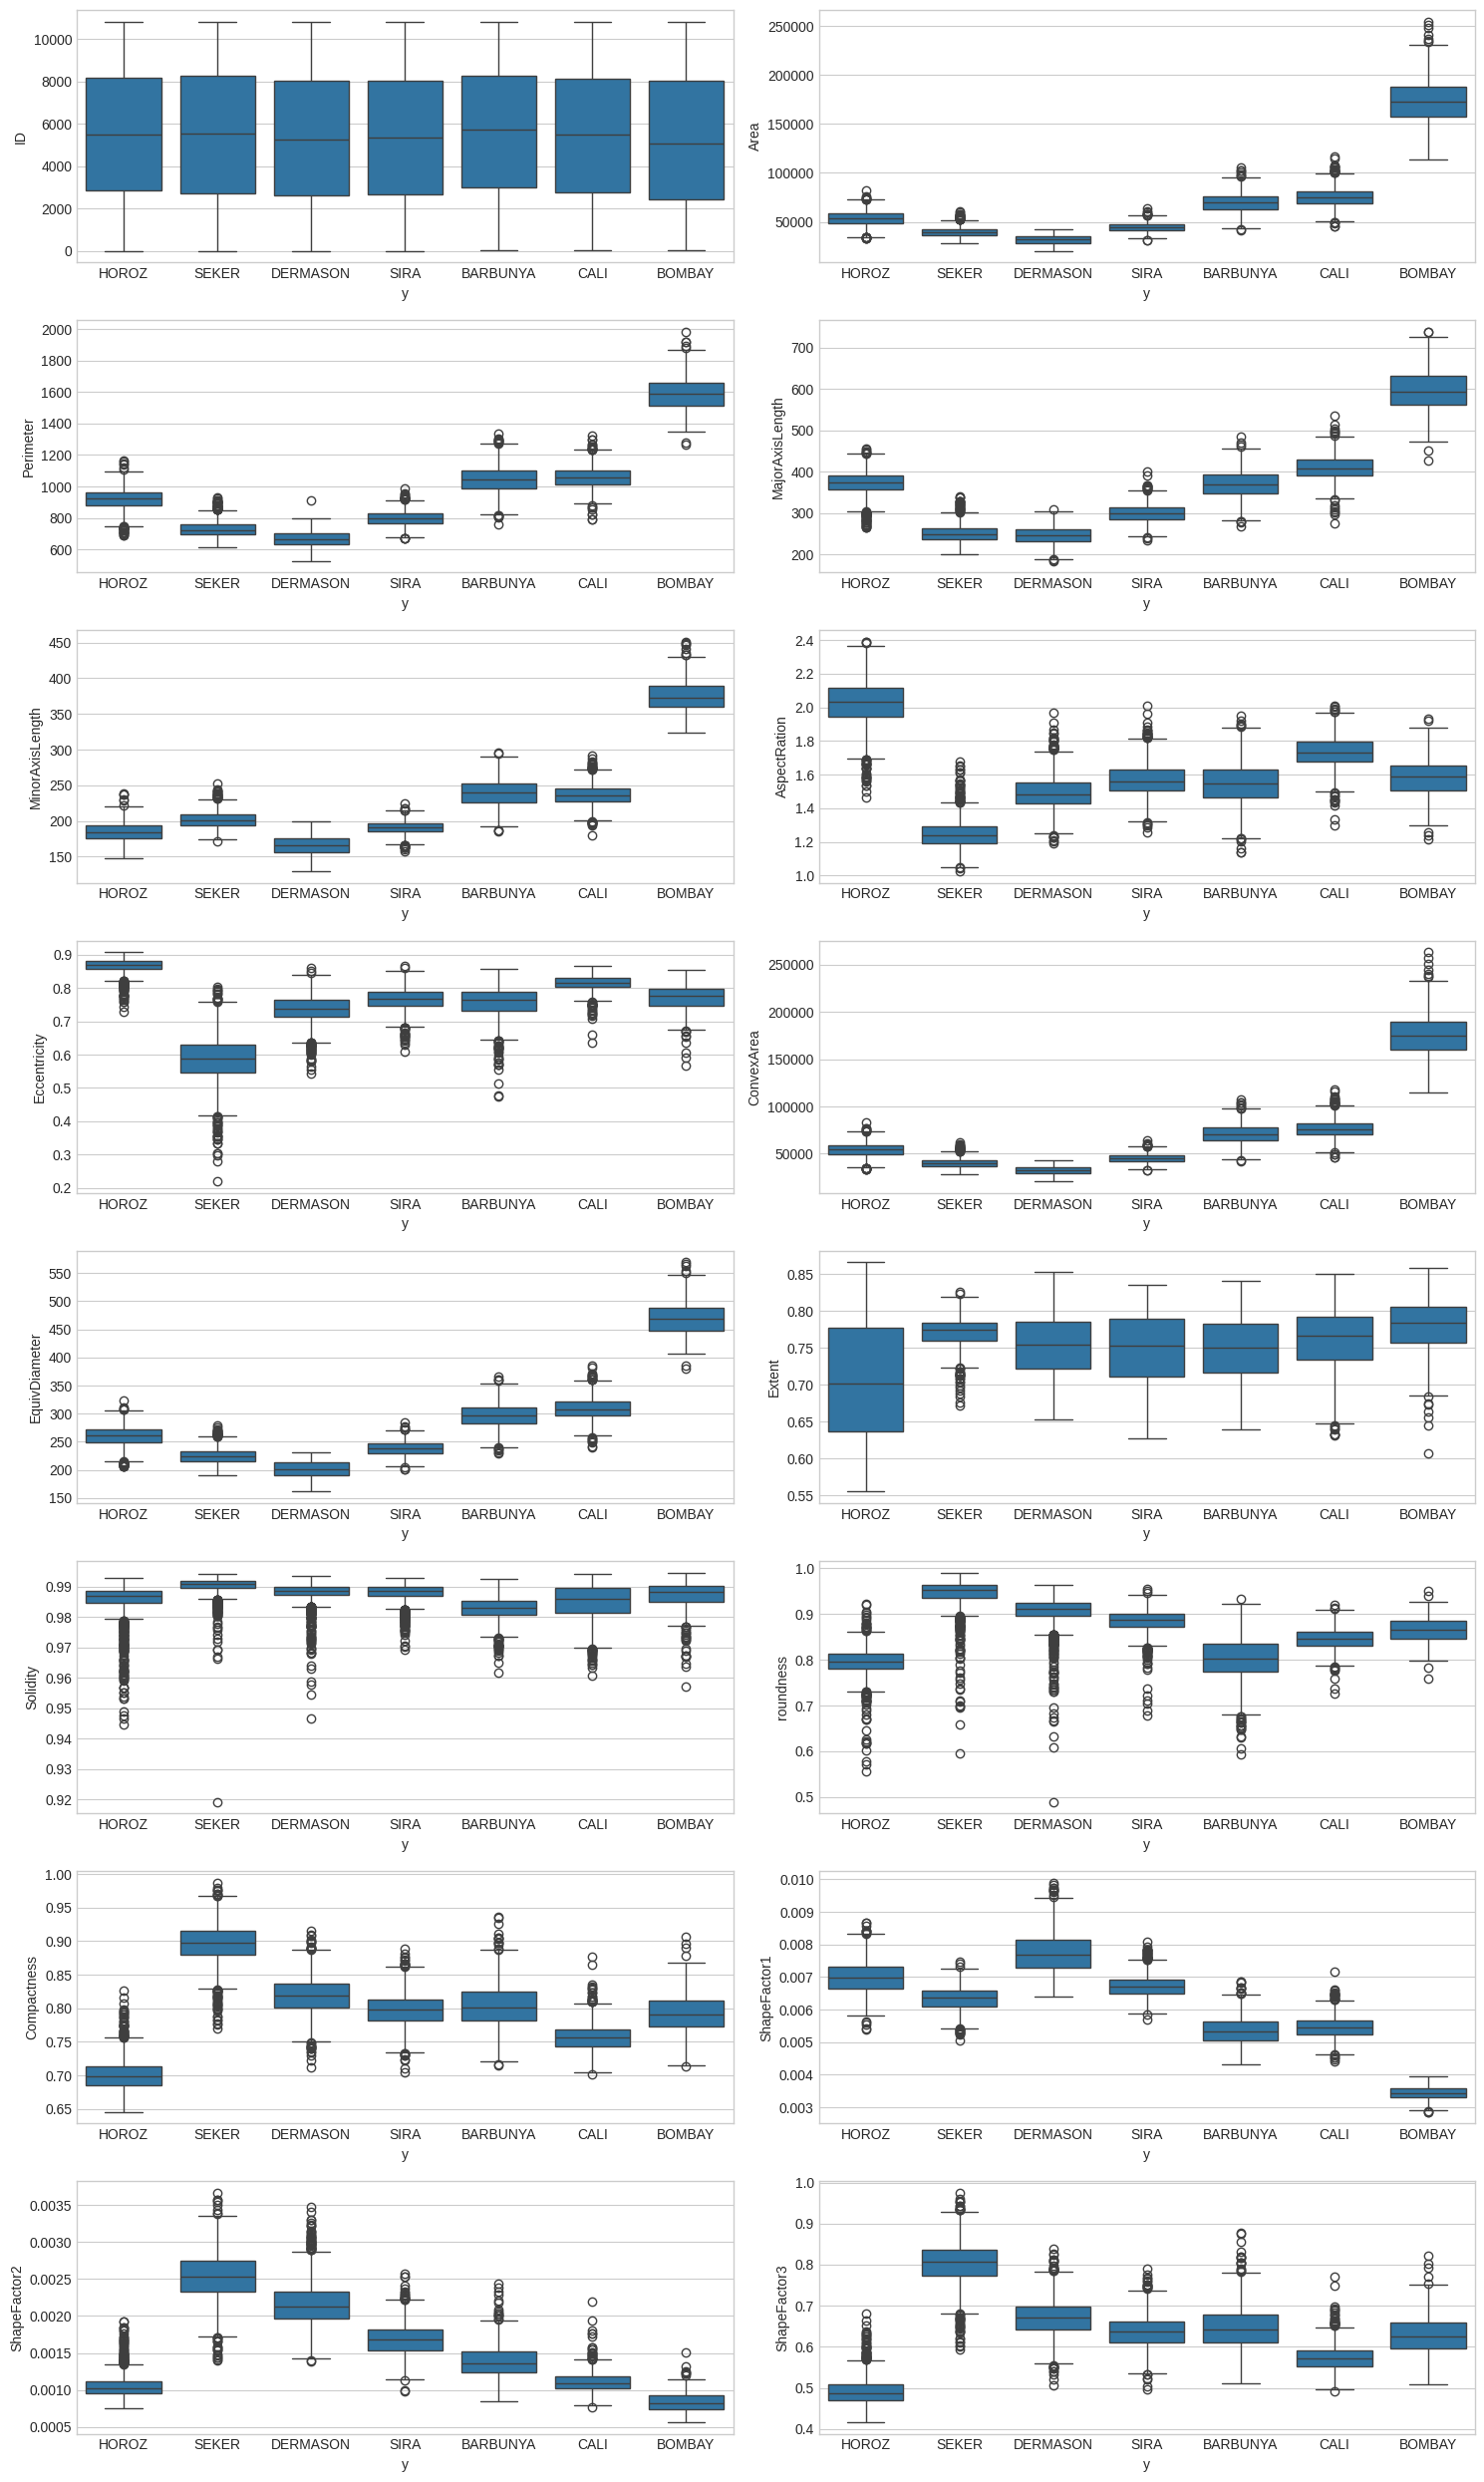

In [17]:
Numeric_cols = beans_train.drop(columns=['y']).columns
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=beans_train['y'], y= beans_train[variable], ax=subplot)
plt.tight_layout()


#Trying adding features to a copy to see if it would give better predictions

In [18]:
beans_train1 = beans_train.copy()
beans_train1['Perimeter_Area'] = beans_train1['Perimeter'] * beans_train1['Area']
beans_train1['Major_Minor'] = beans_train1['MajorAxisLength'] * beans_train1['MinorAxisLength']
# Polynomial features for Area
poly = PolynomialFeatures(degree=2, include_bias=False)
area_poly = poly.fit_transform(beans_train1[['Area']])
area_poly_df = pd.DataFrame(area_poly, columns=[f'Area_poly_{i}' for i in range(1, area_poly.shape[1] + 1)])
beans_train1 = pd.concat([beans_train, area_poly_df], axis=1)
# Ratio features
beans_train1['Area_ConvexArea_ratio'] = beans_train1['Area'] / beans_train1['ConvexArea']


#K nearest Neigbors

Low K values lead to overfitting, high K values can lead to underfitting.

I tested the error rate vs k, and accuracy vs K. 19 gave me the best results, which gave a good balance between bias and variance.

In [19]:
beanKnnClassifier = KNeighborsClassifier(n_neighbors=19)

#Split Data and Test

In [37]:
y = beans_train['y']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

y1 = beans_train1['y']
label_encoder = LabelEncoder()
y_encoded1 = label_encoder.fit_transform(y1)

In [38]:
X = beans_train.drop('y', axis=1)
y = beans_train[["y"]]
X_train, X_test, y_train, y_test= train_test_split(X, y_encoded, test_size=0.2, random_state = 42)

X_1 = beans_train1.drop('y', axis=1)
y_1 = beans_train1[["y"]]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_encoded1, test_size=0.2, random_state = 42)

#Scale the X_train

In [43]:
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).column

In [44]:
categorical_features

Index([], dtype='object')

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', KNeighborsClassifier(n_neighbors=19))])

In [46]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [48]:
# Output predictions and true values
print(f"Predictions: {y_pred}")
print(f"True Values: {y_test}")

Predictions: [3 2 3 ... 5 3 3]
True Values: [3 2 3 ... 5 3 3]


#Fit model

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
# Print results
print(f"Accuracy of the Model: {accuracy}")
print("\nClassification Report:\n", classification)


Accuracy of the Model: 0.9238578680203046

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       232
           1       1.00      1.00      1.00        79
           2       0.91      0.93      0.92       254
           3       0.91      0.91      0.91       555
           4       0.97      0.95      0.96       288
           5       0.96      0.97      0.97       336
           6       0.85      0.88      0.87       423

    accuracy                           0.92      2167
   macro avg       0.94      0.93      0.94      2167
weighted avg       0.92      0.92      0.92      2167



On average, the model correctly predicts the class of the bean 92.39% of the time across all types of beans. This is a high accuracy rate, suggesting that the model is performing well in general.

Precision indicates the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to a low false positive rate.

Recall indicates the ratio of correctly predicted positive observations to all observations in actual class.

f1-score is the weighted average of Precision and Recall. This score takes both false positives and false negatives into account.

support is the number of actual occurrences of the class in the dataset.

The average percision, recall, and f1-score were high.

Bombay has a very high precision and recall which is expected as it was very well seperated from the other feautres.


#Scatter plot of actual and predictions

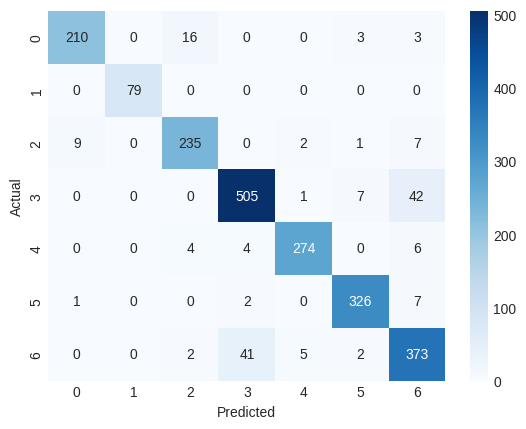

In [50]:
# Display confusion matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

    210 instances of class 0 were correctly predicted as class 0.
    79 instances of class 1 were correctly predicted as class 1.
    235 instances of class 2 were correctly predicted as class 2.
    505 instances of class 3 were correctly predicted as class 3.
    274 instances of class 4 were correctly predicted as class 4.
    326 instances of class 5 were correctly predicted as class 5.
    373 instances of class 6 were correctly predicted as class 6.

    16 instances of class 0 were incorrectly predicted as class 1.
    41 instances of class 6 were incorrectly predicted as class 3.

#Metrics

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Compute R^2
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 0.6119058606368251
R^2 Score: 0.8236022119200533


MSE is te avegraeg of the squares of the errors. The MSE is 0.6119 for this case. These are arbitrary numbers without intrinsic ordinal value because we used labelencoder. Therefore, this amy suggest, that, on average, the predictions are somehwat close tot he true labels.

The R2 is 0.8236 which means that a significant proportion of the variance is predicted from the features given the model used. The data fits the line well.

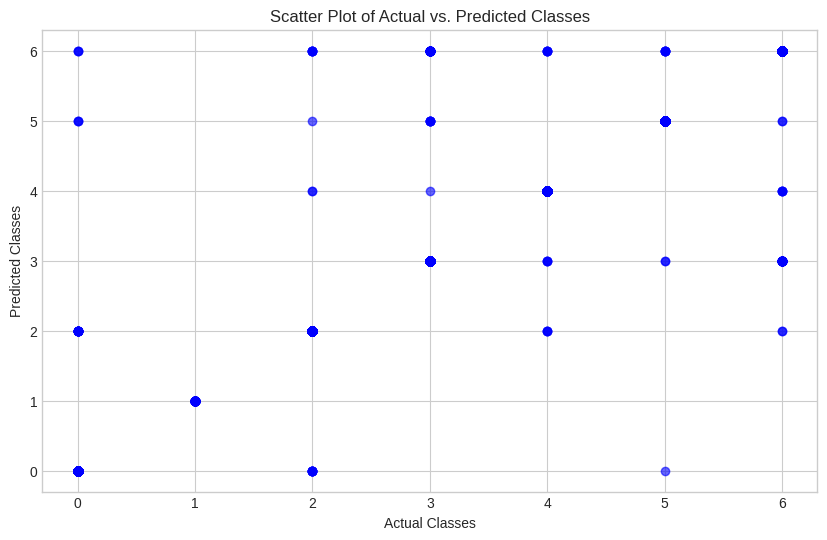

In [54]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.title('Scatter Plot of Actual vs. Predicted Classes')
plt.xlabel('Actual Classes')
plt.ylabel('Predicted Classes')
plt.grid(True)
plt.show()